Cartpole has four observations in each state: position of the cart on the track, angle of the pole, velocity, and angle rate of change. These four observations govern the agent's two simple actions: move left or right.

We can use linear multiplication (matrix multiplication) to tie the four observations to actions. Simply define a vector of four weights, one weight for each observation. If the dot product of weights and observations is less than 0, move left, otherwise move right. Begin by initializing the weights randomly between -1 and 1, and then greedily keep the best weights.  

Import modules.

In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from gym import wrappers

Define a simple function that runs a single episode and takes an action based on the dot product of four weights and four observations. This function needs the concept of a reward (points) that increment each time an action occurs. In other words, the longer the cartpole stays on the track, the more points we get.

In [12]:
def run_episode(env, weights):
    
    observation = env.reset()
    total_reward = 0
    
    for _ in range(200):
        action = 0 if np.matmul(weights, observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        total_reward += reward
        
        if done:
            break
    
    return total_reward

Test the run_episode function to make sure it works.

In [13]:
env = gym.make('CartPole-v0')
weights = np.random.rand(4) * 2 - 1

episode = run_episode(env, weights)

print(episode)

[2017-04-13 16:36:24,123] Making new env: CartPole-v0


25.0


We see that the function successfully returns total_reward.

We can also define a function that naively searches for the best weights by running many training episodes. This function randomly creates four weights and calls the run_episode function with the random weights. It tracks the highest reward until reward reaches 200 points. It also tracks the number of training episodes required to reach 200 points (i.e., how many random weight guesses are needed to derive the best weights).

In [14]:
def get_best_weights(submit):
    # set submit to False if training to get best weights, set to True if running episodes with best weights found 
    
    env = gym.make('CartPole-v0')
    
    if submit:
        # log data
        env = gym.wrappers.Monitor(env, 'cartpole-experiments/', force=True)

    counter = 0
    best_weights = None
    best_reward = 0
    
    for _ in range(10000):
        counter += 1
        weights = np.random.rand(4) * 2 - 1
        reward = run_episode(env, weights)
        
        if reward > best_reward:
            best_reward = reward
            best_weights = weights
            
            if reward == 200:
                break
    
    if submit:
        # run episodes with the best weights
        for _ in range(100):
            run_episode(env, best_weights)
        
        env.monitor.close()
                
    return counter

Test the get_best_weights function to make sure it works.

In [17]:
best_weights_test = get_best_weights(submit=False)

print(best_weights_test)

[2017-04-13 16:36:55,196] Making new env: CartPole-v0


11


The function successfully returns the counter for how many weight guesses it took to reach 200 points. Run the function multiple times to verify that the counter changes, since the initial weight guesses are stochastic.

With these two functions, we can now analyze the distribution of guesses required to find the best weights.

[2017-04-13 16:37:50,574] Making new env: CartPole-v0
[2017-04-13 16:37:50,584] Making new env: CartPole-v0
[2017-04-13 16:37:50,594] Making new env: CartPole-v0
[2017-04-13 16:37:50,610] Making new env: CartPole-v0
[2017-04-13 16:37:50,626] Making new env: CartPole-v0
[2017-04-13 16:37:50,642] Making new env: CartPole-v0
[2017-04-13 16:37:50,652] Making new env: CartPole-v0
[2017-04-13 16:37:50,670] Making new env: CartPole-v0
[2017-04-13 16:37:50,687] Making new env: CartPole-v0
[2017-04-13 16:37:50,704] Making new env: CartPole-v0
[2017-04-13 16:37:50,714] Making new env: CartPole-v0
[2017-04-13 16:37:50,725] Making new env: CartPole-v0
[2017-04-13 16:37:50,763] Making new env: CartPole-v0
[2017-04-13 16:37:50,779] Making new env: CartPole-v0
[2017-04-13 16:37:50,799] Making new env: CartPole-v0
[2017-04-13 16:37:50,814] Making new env: CartPole-v0
[2017-04-13 16:37:50,826] Making new env: CartPole-v0
[2017-04-13 16:37:50,846] Making new env: CartPole-v0
[2017-04-13 16:37:50,862] Ma

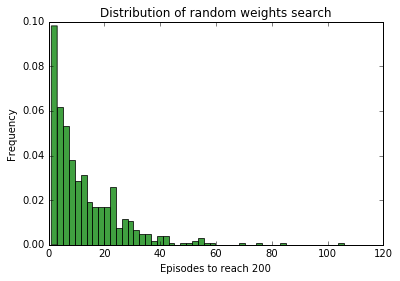

Average number of weight guesses to get 200 points: 13.072


In [19]:
# store the counts of guesses in a list
counter_results = []

# run the get_best_weights function 500 times
for _ in range(500):
    counter_results.append(get_best_weights(submit=False))
    
# plot frequency of episodes required to reach reward of 200 
plt.hist(counter_results, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes to reach 200')
plt.ylabel('Frequency')
plt.title('Distribution of random weights search')
plt.show()

# print the average number of episodes required to reach reward of 200
print('Average number of weight guesses to get 200 points: %s' % str(np.sum(counter_results) / 500.0))

We can see that on average it doesn't take long to reach decent weights with random guessing.